In [22]:
import cv2
import face_recognition
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
%matplotlib inline

In [7]:
image_file = "image.jpeg"
image = face_recognition.load_image_file(image_file)
face_landmarks_list = face_recognition.face_landmarks(image)

In [8]:
print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

I found 1 face(s) in this photograph.


In [10]:
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

In [16]:
for face_landmarks in face_landmarks_list:
    # Print the location of each facial feature in this image
    facial_features = [
        'chin',
        'left_eyebrow',
        'right_eyebrow',
        'nose_bridge',
        'nose_tip',
        'left_eye',
        'right_eye',
        'top_lip',
        'bottom_lip'
    ]
    
    for facial_feature in facial_features:
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in facial_features:
        d.line(face_landmarks[facial_feature], width=5)

# Display drawed image
#pil_image.show()
pil_image.save('test.png')

The chin in this face has the following points: [(260, 461), (255, 518), (256, 577), (264, 634), (274, 691), (297, 743), (336, 787), (389, 820), (457, 830), (527, 825), (583, 794), (629, 754), (660, 703), (676, 644), (686, 582), (691, 521), (689, 459)]
The left_eyebrow in this face has the following points: [(282, 437), (307, 403), (352, 397), (395, 405), (437, 423)]
The right_eyebrow in this face has the following points: [(488, 423), (535, 404), (581, 396), (628, 404), (656, 439)]
The nose_bridge in this face has the following points: [(463, 461), (463, 501), (463, 540), (463, 581)]
The nose_tip in this face has the following points: [(409, 601), (435, 609), (463, 618), (491, 609), (519, 602)]
The left_eye in this face has the following points: [(328, 471), (350, 453), (381, 455), (408, 478), (378, 483), (348, 481)]
The right_eye in this face has the following points: [(526, 478), (553, 456), (585, 453), (609, 473), (587, 484), (556, 484)]
The top_lip in this face has the following p

In [24]:
def draw_line(ax,x1,y1,x2,y2,color='black'):
    ax.annotate('', # empty text
                xy=(x1, y1),
                xytext=(x2, y2),
                ha='center', # ha = 'left',
                va='bottom',
                arrowprops=dict(edgecolor=color,arrowstyle="<->",linestyle='--') # facecolor=color,
               )
    
def add_index(ax,text,x,y,v_offset=3,color='black'):
    ax.annotate(text,
                xy=(x, y),
                xytext=(0, v_offset),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', # ha = 'left',
                va='bottom',
                color=color
               )

In [34]:
def eye():
    left_eye = [(328, 471), (350, 453), (381, 455), (408, 478), (378, 483), (348, 481)]
    right_eye = [(526, 478), (553, 456), (585, 453), (609, 473), (587, 484), (556, 484)]
    x1 = [ x for x,y in left_eye]
    y1 = [ y for x,y in left_eye]
    x2 = [ x for x,y in right_eye]
    y2 = [ y for x,y in right_eye]
    left_eye_center = [368.0, 474.5]
    right_eye_center = [567.5, 475.5]
    x_values = [left_eye_center[0], right_eye_center[0]]
    y_values = [left_eye_center[1], right_eye_center[1]]
    fig, ax = plt.subplots()
    ax.plot(x1, y1,color='green', marker='*')
    ax.plot(x2, y2,color='blue', marker='*')
    ax.plot(x_values, y_values, marker='o')
    plt.gca().invert_yaxis()
    
    for i in range(6):
        x = left_eye[i][0]
        y = left_eye[i][1]
        add_index(ax,str(i),x,y,color='green',v_offset=5)
        
    for i in range(6):
        x = right_eye[i][0]
        y = right_eye[i][1]
        add_index(ax,str(i),x,y,color='green',v_offset=-20)
        
    plt.show()
    

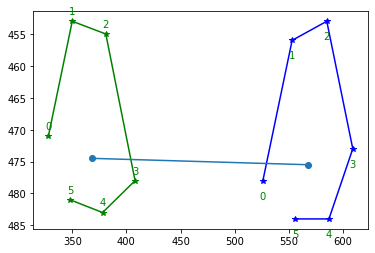

In [35]:
eye()

In [29]:
x1, y1 = 328, 471
x2, y2 = 408, 478
x_m_point = (x1 + x2)/2
y_m_point = (y1 + y2)/2
print(f"Mid point of left eye: {x_m_point, y_m_point}")
x1, y1 = 526, 478
x2, y2 = 609, 473
x_m_point = (x1 + x2)/2
y_m_point = (y1 + y2)/2
print(f"Mid point of right eye: {x_m_point, y_m_point}")

Mid point of left eye: (368.0, 474.5)
Mid point of right eye: (567.5, 475.5)


In [42]:
left_eye_center = [368.0, 474.5]
right_eye_center = [567.5, 475.5]
dy = right_eye_center[1] - left_eye_center[1]
dx = right_eye_center[0] - left_eye_center[0]
angle = np.degrees(np.arctan2(dy, dx)) - 180
angle

-179.71280551549282

In [43]:
if (angle<5) or (angle<-175):
    print("good score")
else:
    print("bad score")

good score
